# Introduction

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    

## 1. Bank Marketing dataset:
It contains 41188 and 20 attributes.

In [157]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp
import sklearn

In [158]:
unknown_values = ['unknown']

In [159]:
old = pd.read_csv('bank-additional-full.csv', sep = ';', na_values = unknown_values)
old.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [160]:
df = old.dropna()

In [161]:
category = pd.cut(df.age, bins = [0,20, 55, 100], labels = ['Teenage', 'Adult', 'Elder'])
df.insert(5, 'Age Group', category)

In [162]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
Age Group         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30488 non-null  int64   
 1   job             30488 non-null  object  
 2   marital         30488 non-null  object  
 3   education       30488 non-null  object  
 4   default         30488 non-null  object  
 5   Age Group       30488 non-null  category
 6   housing         30488 non-null  object  
 7   loan            30488 non-null  object  
 8   contact         30488 non-null  object  
 9   month           30488 non-null  object  
 10  day_of_week     30488 non-null  object  
 11  duration        30488 non-null  int64   
 12  campaign        30488 non-null  int64   
 13  pdays           30488 non-null  int64   
 14  previous        30488 non-null  int64   
 15  poutcome        30488 non-null  object  
 16  emp.var.rate    30488 non-null  float64 
 17  cons.price.i

In [27]:
df

,age,job,marital,education,default,Age Group,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,Adult,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,Adult,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,Elder,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,Elder,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,Adult,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,Elder,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,Adult,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [122]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [124]:
df['Age Group'].value_counts()

Adult      37466
Elder       3582
Teenage      140
Name: Age Group, dtype: int64

In [129]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [130]:
df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [136]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [138]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [144]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [145]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [146]:
df.duration.value_counts()

85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

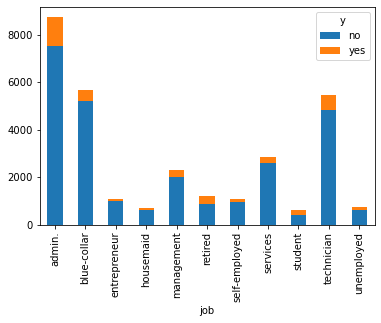

In [28]:
df.groupby(['job','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [29]:
crosstab, test_results, expected = rp.crosstab(df["job"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                 no    yes     All
job                                
admin.         24.67   3.99   28.66
blue-collar    17.13   1.48   18.61
entrepreneur    3.24   0.33    3.57
housemaid       1.98   0.29    2.26
management      6.64   0.94    7.58
retired         2.82   1.17    3.99
self-employed   3.15   0.43    3.58
services        8.52   0.85    9.37
student         1.33   0.67    2.00
technician     15.85   2.10   17.95
unemployed      2.01   0.41    2.42
All            87.34  12.66  100.00

In [31]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,730.2239
1,p-value =,0.0000
2,Cramer's V =,0.1548


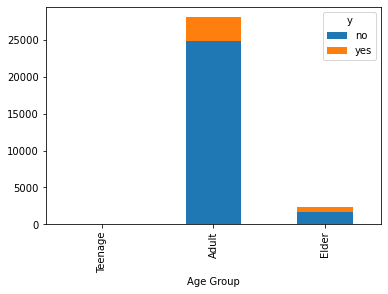

In [34]:
df.groupby(['Age Group','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [35]:
crosstab, test_results, expected = rp.crosstab(df["Age Group"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y             no    yes     All
Age Group                      
Teenage     0.17   0.10    0.28
Adult      81.50  10.65   92.14
Elder       5.67   1.91    7.58
All        87.34  12.66  100.00

In [36]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,405.1005
1,p-value =,0.0000
2,Cramer's V =,0.1153


In [37]:
crosstab, test_results, expected = rp.crosstab(df["marital"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y            no    yes     All
marital                       
divorced  10.31   1.34   11.65
married   50.63   6.74   57.37
single    26.40   4.57   30.97
All       87.34  12.66  100.00

In [38]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,54.3936
1,p-value =,0.0000
2,Cramer's V =,0.0422


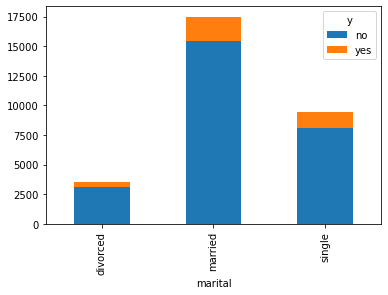

In [39]:
df.groupby(['marital','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

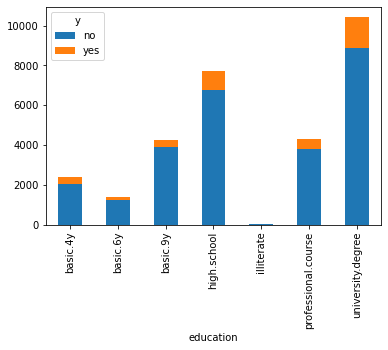

In [40]:
df.groupby(['education','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [41]:
crosstab, test_results, expected = rp.crosstab(df["education"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                       no    yes     All
education                                
basic.4y              6.74   1.07    7.81
basic.6y              4.11   0.45    4.56
basic.9y             12.78   1.25   14.03
high.school          22.19   3.06   25.25
illiterate            0.03   0.01    0.04
professional.course  12.41   1.76   14.17
university.degree    29.09   5.06   34.15
All                  87.34  12.66  100.00

In [42]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,115.4927
1,p-value =,0.0000
2,Cramer's V =,0.0615


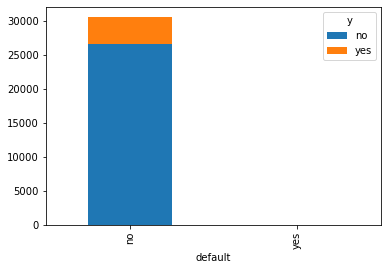

In [43]:
df.groupby(['default','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [44]:
crosstab, test_results, expected = rp.crosstab(df["default"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y           no    yes     All
default                      
no       87.33  12.66   99.99
yes       0.01   0.00    0.01
All      87.34  12.66  100.00

In [45]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4348
1,p-value =,0.5096
2,Cramer's phi =,0.0038


In [49]:
crosstab, test_results, expected = rp.crosstab(df["housing"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y           no    yes     All
housing                      
no       40.18   5.63   45.81
yes      47.16   7.03   54.19
All      87.34  12.66  100.00

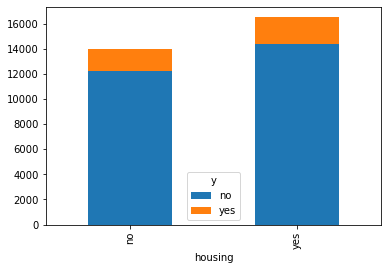

In [46]:
df.groupby(['housing','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [47]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.4348
1,p-value =,0.5096
2,Cramer's phi =,0.0038


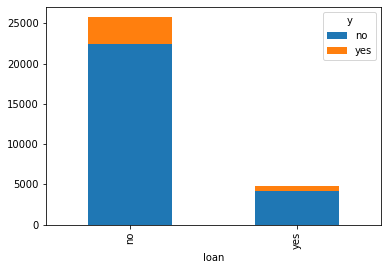

In [48]:
df.groupby(['loan','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [26]:
crosstab, test_results, expected = rp.crosstab(df["loan"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y        no    yes     All
loan                      
no    74.88   9.58   84.46
yes   13.84   1.70   15.54
All   88.72  11.28  100.00

In [10]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,630.9590
1,p-value =,0.0000
2,Cramer's phi =,0.1439


In [9]:
crosstab, test_results, expected = rp.crosstab(df["contact"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y             no    yes     All
contact                        
cellular   56.32  10.74   67.05
telephone  31.03   1.92   32.95
All        87.34  12.66  100.00

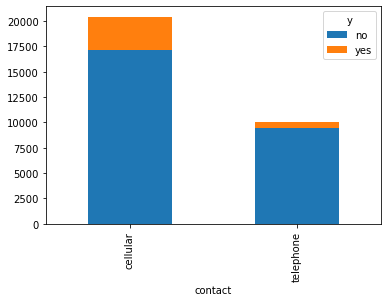

In [51]:
df.groupby(['contact','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [11]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,630.9590
1,p-value =,0.0000
2,Cramer's phi =,0.1439


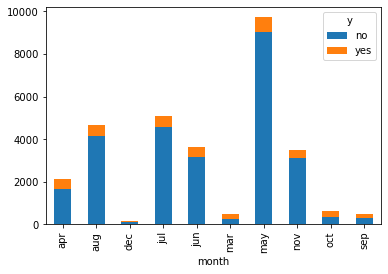

In [53]:
df.groupby(['month','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [54]:
crosstab, test_results, expected = rp.crosstab(df["month"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y         no    yes     All
month                      
apr     5.40   1.54    6.94
aug    13.58   1.75   15.33
dec     0.27   0.24    0.51
jul    14.99   1.68   16.67
jun    10.37   1.48   11.85
mar     0.77   0.81    1.58
may    29.63   2.30   31.92
nov    10.27   1.20   11.47
oct     1.16   0.94    2.11
sep     0.90   0.73    1.62
All    87.34  12.66  100.00

In [55]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,2358.7894
1,p-value =,0.0000
2,Cramer's V =,0.2782


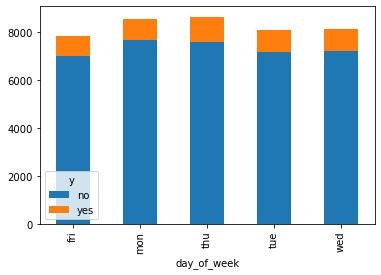

In [11]:
df.groupby(['day_of_week','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [56]:
crosstab, test_results, expected = rp.crosstab(df["day_of_week"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y               no    yes     All
day_of_week                      
fri          16.59   2.22   18.81
mon          18.28   2.32   20.59
thu          18.09   2.88   20.98
tue          16.94   2.59   19.53
wed          17.44   2.65   20.09
All          87.34  12.66  100.00

In [57]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,25.6693
1,p-value =,0.0000
2,Cramer's V =,0.0290


In [58]:
expected

y            
y                     no         yes
day_of_week                         
fri          5008.222448  725.777552
mon          5484.239406  794.760594
thu          5585.556776  809.443224
tue          5201.249508  753.750492
wed          5349.731862  775.268138

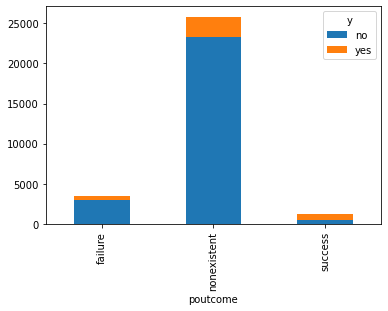

In [59]:
df.groupby(['poutcome','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [60]:
crosstab, test_results, expected = rp.crosstab(df["poutcome"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y               no    yes     All
poutcome                         
failure       9.69   1.67   11.35
nonexistent  76.31   8.44   84.74
success       1.35   2.56    3.91
All          87.34  12.66  100.00

In [61]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,3181.0924
1,p-value =,0.0000
2,Cramer's V =,0.3230


Logistic Regression

Default, Housing, Loan, poutcome, euribor3m

In [12]:
train = df

In [68]:
train.head()

,age,job,marital,education,default,Age Group,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,Adult,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,Adult,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,Elder,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,Elder,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [140]:
dataset1 = train[['age', 'job', 'education', 'default', 'housing', 'loan']]
y = train[['y']]
dataset1.head()

,age,job,education,default,housing,loan
0,56,housemaid,basic.4y,no,no,no
2,37,services,high.school,no,yes,no
3,40,admin.,basic.6y,no,no,no
4,56,services,high.school,no,no,yes
6,59,admin.,professional.course,no,no,no


In [144]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = y['y'].map({'yes': 1, 'no': 0})
dataset3= pd.merge(dataset2, dataset_response, left_index = True, right_index = True) 

In [145]:
dataset3.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_technician,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,y
0,56,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,59,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
array = dataset3.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [153]:
# 20% of the data will be used for testing
test_size= 0.20
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=None)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [155]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [156]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=None)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LR: 0.874252 (0.005349)
KNN: 0.860025 (0.006272)
CART: 0.862444 (0.006932)
NB: 0.459861 (0.055712)


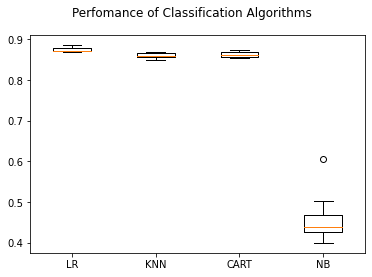

In [163]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

In [164]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
predictions = LR.predict(X_test)

In [166]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))


0.8701213512627091


[[5306    0]
 [ 792    0]]


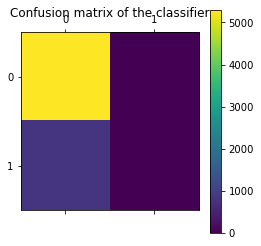

In [167]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [168]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5306
           1       0.00      0.00      0.00       792

    accuracy                           0.87      6098
   macro avg       0.44      0.50      0.47      6098
weighted avg       0.76      0.87      0.81      6098



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
LR = KNeighborsClassifier()
LR.fit(X_train, Y_train) 